<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer analysis
* Iterators

In [5]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

import os
import re

from collections import defaultdict
from functools import reduce

import prophet as pr
import sklearn.datasets as skd

# Customer Analysis

In [4]:
os.listdir()

['.config',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'bz_data_analyis.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'groceries.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'sales.csv',
 'test.csv',
 'online_retail_II.xlsx',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'sample_data']

In [15]:
df = pd.read_csv('mock_sales_data.csv')
df.columns = [a.lower() for a in df.columns]
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df.index = df['date']
df.head()

,date,price,salesqty
date,,,
2021-01-04,2021-01-04,122.0,1433.0
2021-01-05,2021-01-05,118.6,977.0
2021-01-06,2021-01-06,125.0,1551.0
2021-01-07,2021-01-07,115.2,1096.0
2021-01-08,2021-01-08,118.1,1052.0


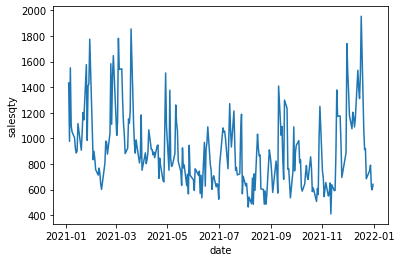

In [16]:
sns.lineplot(data = df, x = 'date', y = 'salesqty')

In [19]:
df['moving'] = df['salesqty'].rolling(window = 20).mean()
df.head()

,date,price,salesqty,moving
date,,,,
2021-01-04,2021-01-04,122.0,1433.0,NaN
2021-01-05,2021-01-05,118.6,977.0,NaN
2021-01-06,2021-01-06,125.0,1551.0,NaN
2021-01-07,2021-01-07,115.2,1096.0,NaN
2021-01-08,2021-01-08,118.1,1052.0,NaN


In [23]:
df.drop('date', axis = 1, inplace = True)

In [26]:
df2 = pd.melt(df.reset_index(), id_vars = ['date', 'price'], var_name = 'type')
df2.head()

,date,price,type,value
0,2021-01-04,122.0,salesqty,1433.0
1,2021-01-05,118.6,salesqty,977.0
2,2021-01-06,125.0,salesqty,1551.0
3,2021-01-07,115.2,salesqty,1096.0
4,2021-01-08,118.1,salesqty,1052.0


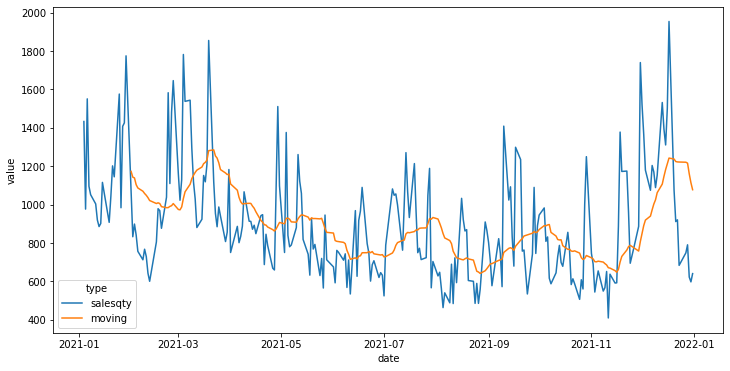

In [28]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df2, x = 'date', y = 'value', hue = 'type')

# Iterators

In [29]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [30]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}